# Model Recovery 

In [1]:
%reload_ext autoreload
%autoreload 2

# Uncomment next line to enable interactive plots!
# %matplotlib inline
%matplotlib notebook
# %matplotlib widget

import numpy as np
from run_model_recovery import *
import multiprocessing as mp
import matplotlib.pyplot as plt

n_worker = int(mp.cpu_count()/2)
pool = mp.Pool(processes = n_worker)
    
# Parameter settings
n_trials = 1000

## 1. Model comparison

Just some examples here

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/8:    LossCounting, Km = 2 ... AIC = 5.38629, BIC = 15.2018 (done in 6.56 secs)
Model 2/8:     LNP_softmax, Km = 2 ... AIC = 630.31, BIC = 640.126 (done in 4.6 secs)
Model 3/8:     LNP_softmax, Km = 4 ... AIC = 635.14, BIC = 654.771 (done in 6.24 secs)
Model 4/8:     RW1972_epsi, Km = 2 ... AIC = 1191.15, BIC = 1200.97 (done in 2.75 secs)
Model 5/8:  RW1972_softmax, Km = 2 ... AIC = 978.129, BIC = 987.944 (done in 3.37 secs)
Model 6/8:        Bari2019, Km = 3 ... AIC = 645.207, BIC = 659.93 (done in 8.35 secs)
Model 7/8:     Hattori2019, Km = 3 ... AIC = 980.087, BIC = 994.81 (done in 5.91 secs)
Model 8/8:     Hattori2019, Km = 4 ... AIC = 503.652, BIC = 523.283 (done in 8.8 secs)


<IPython.core.display.Javascript object>


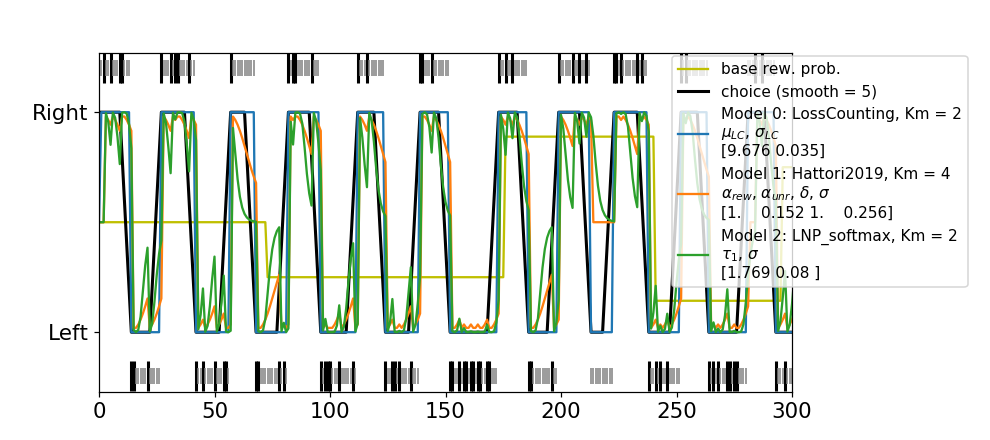

,model,Km,AIC,log10_BF_AIC,BIC,para_notation,para_fitted
0,LossCounting,2,5.39,-0.00,15.20,"$\mu_{LC}$, $\sigma_{LC}$","[9.676, 0.035]"
7,Hattori2019,4,503.65,-108.20,523.28,"$\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$","[1.0, 0.152, 1.0, 0.256]"
1,LNP_softmax,2,630.31,-135.70,640.13,"$\tau_1$, $\sigma$","[1.769, 0.08]"
2,LNP_softmax,4,635.14,-136.75,654.77,"$\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$","[1.691, 1.779, 0.931, 0.075]"
5,Bari2019,3,645.21,-138.94,659.93,"$\alpha_{rew}$, $\delta$, $\sigma$","[0.053, 0.393, 0.01]"
4,RW1972_softmax,2,978.13,-211.23,987.94,"$\alpha_{rew}$, $\sigma$","[0.911, 0.127]"
6,Hattori2019,3,980.09,-211.65,994.81,"$\alpha_{rew}$, $\alpha_{unr}$, $\sigma$","[0.974, 0.91, 0.136]"
3,RW1972_epsi,2,1191.15,-257.49,1200.97,"$\alpha_{rew}$, $\epsilon$","[0.763, 0.54]"


In [2]:
fake_data = generate_fake_data('LossCounting', ['loss_count_threshold_mean','loss_count_threshold_std'], [10,0])
model_comparison = BanditModelComparison(fake_data, pool = pool, plot_predictive=[0,1,2])
model_comparison.fit()
model_comparison.show()

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/8:    LossCounting, Km = 2 ... AIC = 1416.01, BIC = 1425.83 (done in 4.97 secs)
Model 2/8:     LNP_softmax, Km = 2 ... AIC = 1264.53, BIC = 1274.35 (done in 3.6 secs)
Model 3/8:     LNP_softmax, Km = 4 ... AIC = 1268.38, BIC = 1288.01 (done in 6.62 secs)
Model 4/8:     RW1972_epsi, Km = 2 ... AIC = 1280.64, BIC = 1290.45 (done in 3.54 secs)
Model 5/8:  RW1972_softmax, Km = 2 ... AIC = 1233.04, BIC = 1242.86 (done in 2.95 secs)
Model 6/8:        Bari2019, Km = 3 ... AIC = 1235.04, BIC = 1249.76 (done in 4.82 secs)
Model 7/8:     Hattori2019, Km = 3 ... AIC = 1234.33, BIC = 1249.06 (done in 4.59 secs)
Model 8/8:     Hattori2019, Km = 4 ... AIC = 1236.33, BIC = 1255.96 (done in 7.47 secs)


<IPython.core.display.Javascript object>


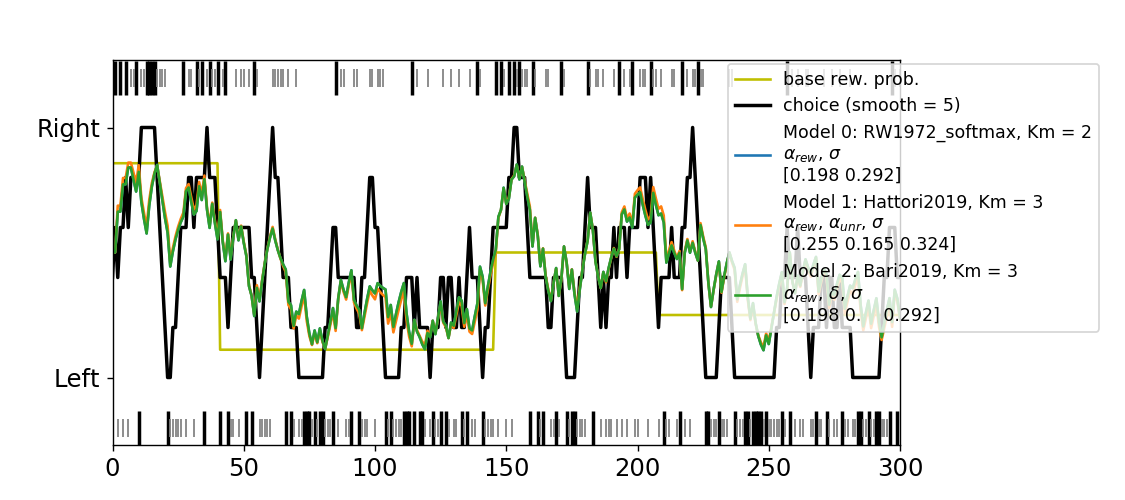

,model,Km,AIC,log10_BF_AIC,BIC,para_notation,para_fitted
4,RW1972_softmax,2,1233.04,-0.00,1242.86,"$\alpha_{rew}$, $\sigma$","[0.198, 0.292]"
6,Hattori2019,3,1234.33,-0.28,1249.06,"$\alpha_{rew}$, $\alpha_{unr}$, $\sigma$","[0.255, 0.165, 0.324]"
5,Bari2019,3,1235.04,-0.43,1249.76,"$\alpha_{rew}$, $\delta$, $\sigma$","[0.198, 0.0, 0.292]"
7,Hattori2019,4,1236.33,-0.71,1255.96,"$\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$","[0.255, 0.165, 0.0, 0.324]"
1,LNP_softmax,2,1264.53,-6.84,1274.35,"$\tau_1$, $\sigma$","[5.527, 0.315]"
2,LNP_softmax,4,1268.38,-7.67,1288.01,"$\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$","[5.144, 29.055, 0.891, 0.305]"
3,RW1972_epsi,2,1280.64,-10.34,1290.45,"$\alpha_{rew}$, $\epsilon$","[0.259, 0.697]"
0,LossCounting,2,1416.01,-39.73,1425.83,"$\mu_{LC}$, $\sigma_{LC}$","[2.917, 10.0]"


In [3]:
fake_data = generate_fake_data('RW1972_softmax', ['learn_rate_rew','softmax_temperature'], [0.2,0.3])
model_comparison = BanditModelComparison(fake_data, pool = pool, plot_predictive=[0,1,2])
model_comparison.fit()
model_comparison.show()

=== Model Comparison ===
Methods = DE, {'DE_pop_size': 16}, pool = True
Model 1/8:    LossCounting, Km = 2 ... AIC = 1342.07, BIC = 1351.88 (done in 5.87 secs)
Model 2/8:     LNP_softmax, Km = 2 ... AIC = 920.092, BIC = 929.908 (done in 4.2 secs)
Model 3/8:     LNP_softmax, Km = 4 ... AIC = 924.092, BIC = 943.723 (done in 7.13 secs)
Model 4/8:     RW1972_epsi, Km = 2 ... AIC = 1155.06, BIC = 1164.87 (done in 2.16 secs)
Model 5/8:  RW1972_softmax, Km = 2 ... AIC = 1051.14, BIC = 1060.95 (done in 3.71 secs)
Model 6/8:        Bari2019, Km = 3 ... AIC = 921.911, BIC = 936.634 (done in 7.26 secs)
Model 7/8:     Hattori2019, Km = 3 ... AIC = 1040.49, BIC = 1055.22 (done in 7.59 secs)
Model 8/8:     Hattori2019, Km = 4 ... AIC = 923.846, BIC = 943.477 (done in 7.69 secs)


<IPython.core.display.Javascript object>


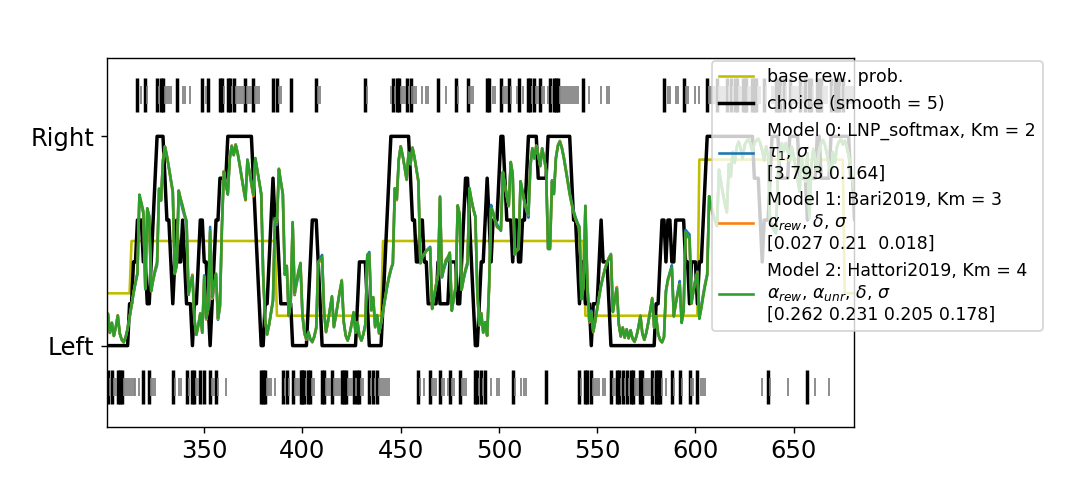

,model,Km,AIC,log10_BF_AIC,BIC,para_notation,para_fitted
1,LNP_softmax,2,920.09,-0.00,929.91,"$\tau_1$, $\sigma$","[3.793, 0.164]"
5,Bari2019,3,921.91,-0.39,936.63,"$\alpha_{rew}$, $\delta$, $\sigma$","[0.027, 0.21, 0.018]"
7,Hattori2019,4,923.85,-0.82,943.48,"$\alpha_{rew}$, $\alpha_{unr}$, $\delta$, $\sigma$","[0.262, 0.231, 0.205, 0.178]"
2,LNP_softmax,4,924.09,-0.87,943.72,"$\tau_1$, $\tau_2$, $w_{\tau_1}$, $\sigma$","[3.599, 3.798, 0.024, 0.164]"
6,Hattori2019,3,1040.49,-26.14,1055.22,"$\alpha_{rew}$, $\alpha_{unr}$, $\sigma$","[0.009, 0.269, 0.01]"
4,RW1972_softmax,2,1051.14,-28.46,1060.95,"$\alpha_{rew}$, $\sigma$","[0.199, 0.163]"
3,RW1972_epsi,2,1155.06,-51.02,1164.87,"$\alpha_{rew}$, $\epsilon$","[0.187, 0.525]"
0,LossCounting,2,1342.07,-91.63,1351.88,"$\mu_{LC}$, $\sigma_{LC}$","[10.005, 10.0]"


In [4]:
fake_data = generate_fake_data('Hattori2019', ['learn_rate_rew','learn_rate_unrew', 'forget_rate','softmax_temperature'], 
                                                      [0.4, 0.2, 0.2, 0.25])  # Almost Hattori et al.
model_comparison = BanditModelComparison(fake_data, pool = pool, plot_predictive=[0,1,2])
model_comparison.fit()
model_comparison.show()

# 2. Confusion matrix and Inversion matrix